In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape

(550068, 12)

In [4]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [10]:
df_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [11]:
df = df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [13]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
df.drop(['User_ID'],axis = 1,inplace = True) ### axis=1 implies rowwise

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
df["Gender"] = df["Gender"].map({'F':0,'M':1})

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
df["Age"] = df["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [20]:
df["Age"].value_counts()

3    313015
4    156724
2    141953
5     65278
6     54784
7     30579
1     21334
Name: Age, dtype: int64

In [21]:
df["City_Category"].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [22]:
df_city=pd.get_dummies(df["City_Category"],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [23]:
df=pd.concat([df,df_city],axis=1)

In [24]:
df=df.drop(['City_Category'],axis=1)

In [25]:
df.head() 

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [27]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [28]:
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [29]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])
print("Missing values in product category 2 are: - ",df["Product_Category_2"].isnull().sum())

Missing values in product category 2 are: -  0


In [30]:
print(df["Product_Category_2"].mode()[0])

8.0


In [31]:
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [32]:
df["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [33]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])
print("Missing values in product category 3 are: - ",df["Product_Category_3"].isnull().sum())

Missing values in product category 3 are: -  0


In [34]:
print(df["Product_Category_3"].mode()[0])

16.0


In [35]:
df.shape

(783667, 12)

In [36]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [38]:
df["Stay_In_Current_City_Years"].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [39]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].map({"0":0,"1":1,"2":2,"3":3,"4+":4})

In [40]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [42]:
df["B"] = df["B"].astype(int)
df.head()
df.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
count,783667.00000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,550068.000000,783667.000000,783667.000000
mean,0.75291,3.496802,8.079300,1.858247,0.409777,5.366196,9.265541,14.988858,9263.968713,0.420764,0.310954
std,0.43132,1.352736,6.522206,1.288790,0.491793,3.878160,4.301427,2.740792,5023.065394,0.493682,0.462884
min,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,1.00000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000,0.000000,0.000000
50%,1.00000,3.000000,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000,0.000000,0.000000
75%,1.00000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000
max,1.00000,7.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


In [43]:
df["C"] = df["C"].astype(int)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

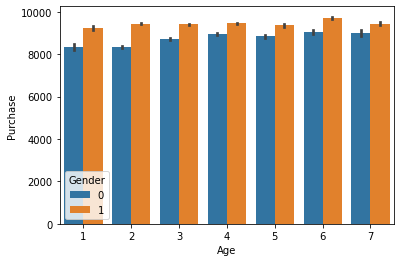

In [45]:
## Age vs Purchase
sns.barplot(x="Age",y="Purchase",hue="Gender",data=df)

#### Purchasing of men is high than women

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

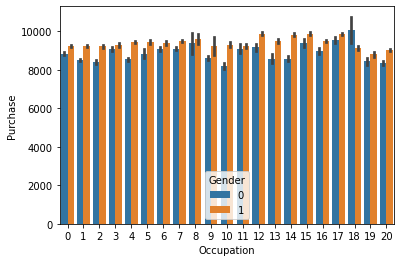

In [46]:
sns.barplot(x="Occupation",y="Purchase",hue="Gender",data=df)

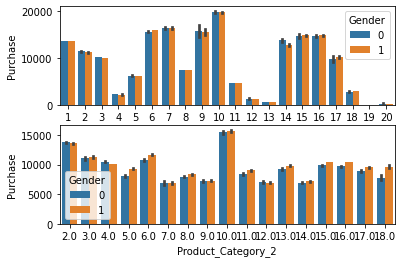

In [47]:
plt.subplots(2,1)
plt.subplot(2,1,1)
sns.barplot(x="Product_Category_1",y="Purchase",hue="Gender",data=df)
plt.subplot(2,1,2)
sns.barplot(x="Product_Category_2",y="Purchase",hue="Gender",data=df)
plt.show()

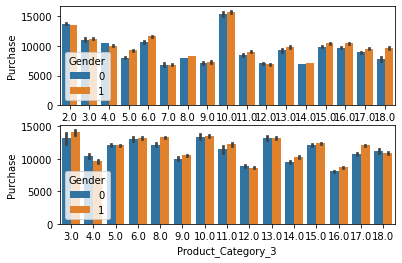

In [48]:
plt.subplots(2,1)
plt.subplot(2,1,1)
sns.barplot(x="Product_Category_2",y="Purchase",hue="Gender",data=df)
plt.subplot(2,1,2)
sns.barplot(x="Product_Category_3",y="Purchase",hue="Gender",data=df)
plt.show()

In [49]:
df["Purchase"].isnull().sum()

233599

In [50]:
df = df[~df['Purchase'].isnull()]

In [51]:
X = df.drop(['Product_ID','Purchase'],axis=1)

In [52]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [53]:
Y = df["Purchase"]

In [54]:
Y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [56]:
type(X_train)

pandas.core.frame.DataFrame

In [57]:
X_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,1,2,14,3,0,1,2.0,16.0,1,0
433826,1,6,0,0,1,8,16.0,16.0,0,0
516298,1,4,17,0,0,3,4.0,12.0,0,1
193380,1,3,4,1,0,8,16.0,16.0,1,0
273542,0,4,20,3,1,3,4.0,12.0,1,0


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4680.8269
- Mean Absolute Error: 3577.7367
- R2 Score: 0.1321
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4683.9207
- Mean Absolute Error: 3577.4986
- R2 Score: 0.1295




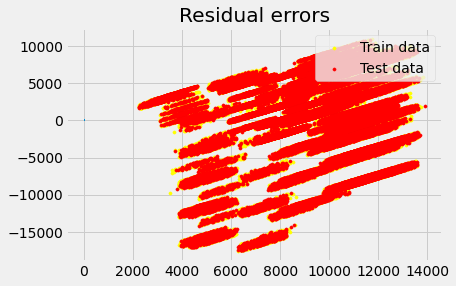

Lasso
Model performance for Training set
- Root Mean Squared Error: 4680.8281
- Mean Absolute Error: 3577.8068
- R2 Score: 0.1321
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4683.9217
- Mean Absolute Error: 3577.5710
- R2 Score: 0.1295




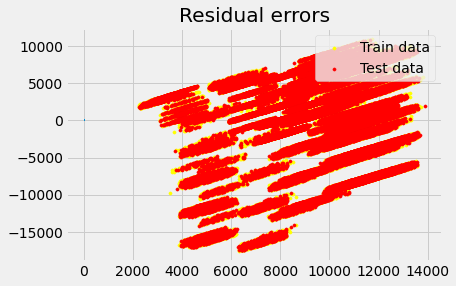

Ridge
Model performance for Training set
- Root Mean Squared Error: 4680.8269
- Mean Absolute Error: 3577.7373
- R2 Score: 0.1321
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4683.9207
- Mean Absolute Error: 3577.4992
- R2 Score: 0.1295




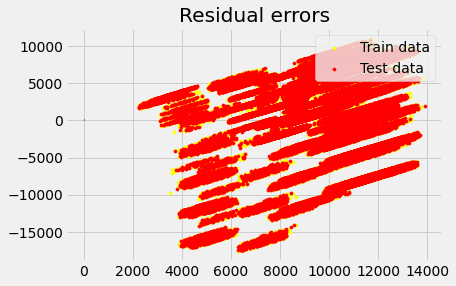

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2984.9911
- Mean Absolute Error: 2191.3834
- R2 Score: 0.6471
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3519.6934
- Mean Absolute Error: 2560.3232
- R2 Score: 0.5085




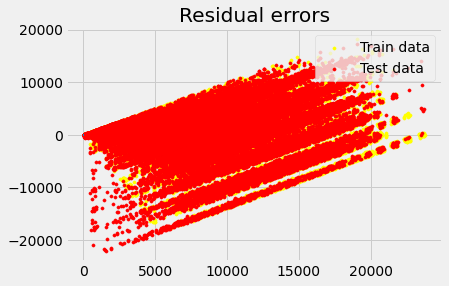

Decision Tree
Model performance for Training set
- Root Mean Squared Error: 2256.1816
- Mean Absolute Error: 1512.3720
- R2 Score: 0.7984
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3334.8826
- Mean Absolute Error: 2361.1494
- R2 Score: 0.5587




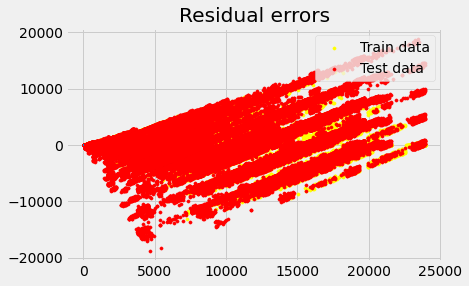

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2315.8510
- Mean Absolute Error: 1667.3946
- R2 Score: 0.7876
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3056.4650
- Mean Absolute Error: 2226.5392
- R2 Score: 0.6293




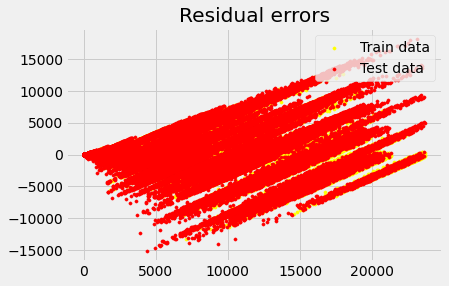

XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 2842.9484
- Mean Absolute Error: 2128.8696
- R2 Score: 0.6798
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2897.1569
- Mean Absolute Error: 2166.3152
- R2 Score: 0.6670




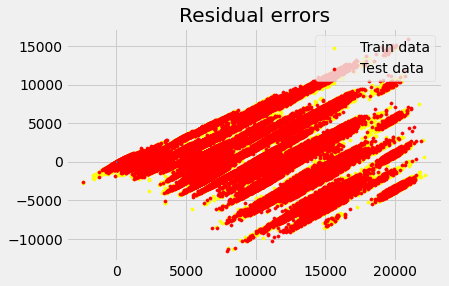

CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 2851.5427
- Mean Absolute Error: 2136.6589
- R2 Score: 0.6779
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2896.4133
- Mean Absolute Error: 2167.5156
- R2 Score: 0.6671




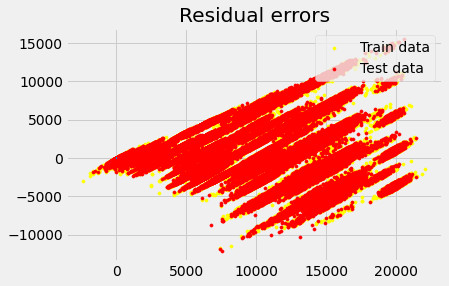

AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 3864.5241
- Mean Absolute Error: 3037.5814
- R2 Score: 0.4084
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3871.9636
- Mean Absolute Error: 3041.2050
- R2 Score: 0.4051




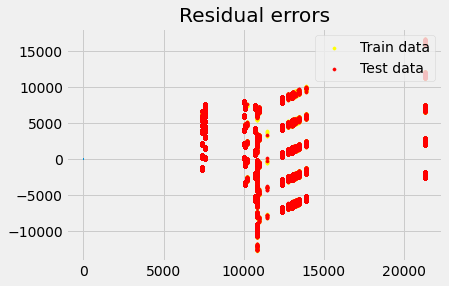

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    plt.style.use('fivethirtyeight')
    plt.scatter(model.predict(X_train), model.predict(X_train) - Y_train,
                color = "yellow", s = 10, label = 'Train data')
    plt.scatter(model.predict(X_test), model.predict(X_test) - Y_test,
                color = "red", s = 10, label = 'Test data')
    plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
    plt.legend(loc = 'upper right')
    plt.title("Residual errors")
    plt.show()

In [63]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.667129
6,XGBRegressor,0.666958
5,Random Forest Regressor,0.629325
4,Decision Tree,0.558718
3,K-Neighbors Regressor,0.508454
8,AdaBoost Regressor,0.405136
2,Ridge,0.129490
0,Linear Regression,0.129490
1,Lasso,0.129489
